# COVID-19 in Italy Analysis
###### Using relational plot


# Libraries and modules required:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Let's look at the data:

In [2]:
data=pd.read_csv(r"C:\Python\pythonProject/covid19_italy_region.csv")

In [3]:
data

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,6022,2020-12-06T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,6023,2020-12-06T17:00:00,ITA,9,Toscana,43.769231,11.255889,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,6024,2020-12-06T17:00:00,ITA,10,Umbria,43.106758,12.388247,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,6025,2020-12-06T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,987,34,5406,333,6726,34644.0


# Let's check out the variables we are dealing with:

In [10]:
data.columns


Index(['SNo', 'Date', 'Country', 'RegionCode', 'RegionName', 'Latitude',
       'Longitude', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed'],
      dtype='object')

# Operational data to help fill in the null value

In [12]:
data.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,3013.000000,11.857143,43.046293,12.225955,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1739.989368,6.274319,2.488987,2.659168,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,1506.500000,7.000000,41.125596,11.121231,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,3013.000000,12.000000,43.616760,12.388247,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,4519.500000,17.000000,45.434905,13.768136,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,6026.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06


# Checking for total null data in each column


In [15]:
data.isnull().sum()


SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

# Relation between the variables using Scatter Plot


We are not filling in the missing spaces in our data set as most of it is already filled.
We will try and analyse with out currect dataset as it is.

## Relation 1: Total number of positive case versus Recovered

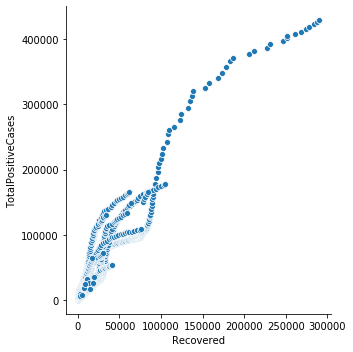

In [29]:
sns.relplot(y="TotalPositiveCases",x="Recovered",data=data)

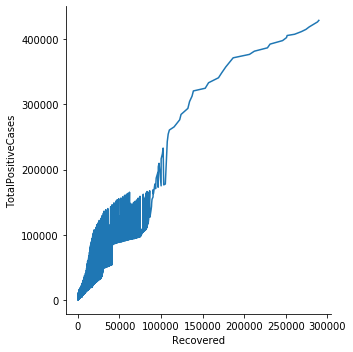

In [78]:
sns.relplot(y="TotalPositiveCases",kind='line',x="Recovered",data=data)

##### Conclution: 

The curve is flattening out suggesting that the recovery rate is gradually but only minimally getting better. 



## Relation 2 : Total number of positive case versus Deaths

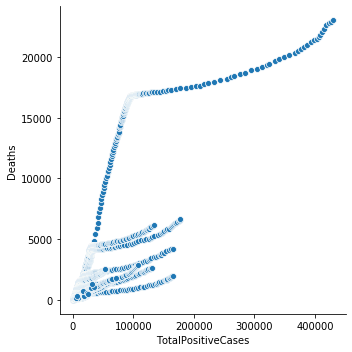

In [33]:
sns.relplot(x="TotalPositiveCases",y="Deaths",data=data)

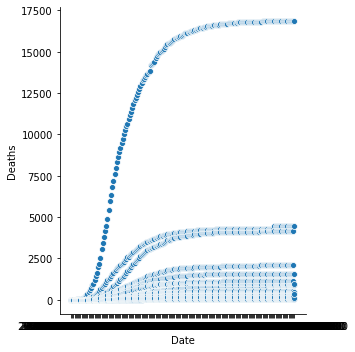

In [46]:
sns.relplot(x="Date",y="Deaths",data=data.head(4000))


##### Conclution:

Initially there is a huge spike suggesting very high mortality rate.

Gradual flattening of the curve suggests that the Mortality rate with time is decreasing.

## Relation 3 : Total number of positive case versus hospitalized patients

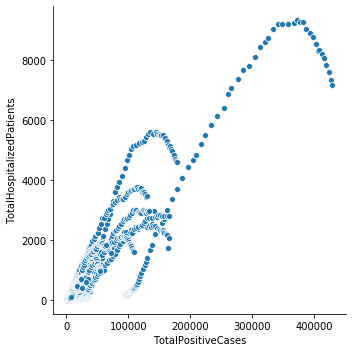

In [99]:
sns.relplot(x="TotalPositiveCases",y="TotalHospitalizedPatients",data=data.tail(3000))

##### Conclusion:

Here we are seeing a drastic decrease in the number of hospitalization with the increase in the total number of cases suggesting that the curve is flattening indeed.

## Let's compare this data with the stats of people who were home confined:

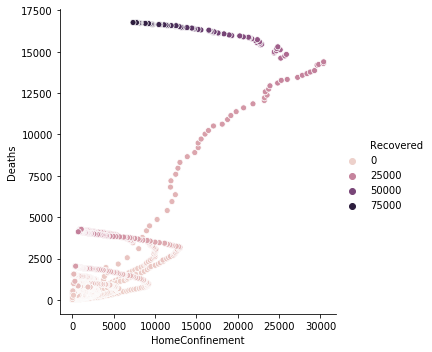

In [74]:
sns.relplot(y="Deaths", x="HomeConfinement", hue="Recovered", data=data.head(3000))

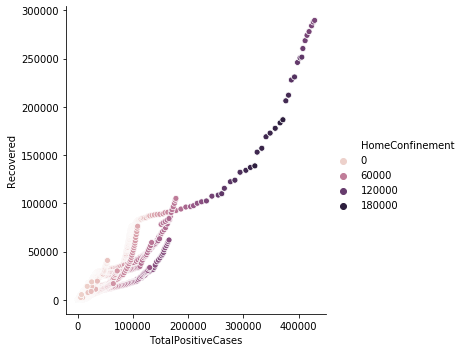

In [77]:
sns.relplot(x="TotalPositiveCases", hue="HomeConfinement", y="Recovered",data=data)


##### Conclusion:

This shows that Home confinement slowed down the Death tolls considerable. 

An increase in the number of people home quarantining directly affected the recovery rate increasing it massively.

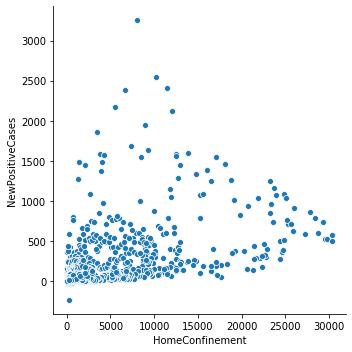

In [76]:
sns.relplot(y="NewPositiveCases",x="HomeConfinement",data=data.head(4000))

###### Conclusion:

This clearly shows the number of new cases of corona positive decreases with the increase of Home confinement.

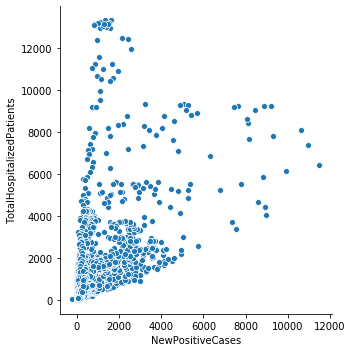

In [92]:
sns.relplot(y="TotalHospitalizedPatients", x="NewPositiveCases",data=data)

##### Conclusion:

Not all patients that were hospitalised due to having displayed any symptoms were corona positive.

# Analysis:

### The Pandemic curve is flattening showing a recovery from Covid 19.

#### A major factor in the recovery process is Home Confinement.